# Training the dataset

### Importing the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and preparing the data

In [2]:
data=pd.read_csv('../data/dataset.csv')
df=pd.DataFrame(data)
# cleaning the null and garbage values
df.dropna(inplace=True)
# adding genre mapping as logisticregression gave 14.83% accuracy and randomforestclassifier gave 23.03% accuracy
genre_mapping = {
    # Electronic & Dance
    'techno': 'Electronic', 'trance': 'Electronic', 'house': 'Electronic', 
    'chicago-house': 'Electronic', 'deep-house': 'Electronic', 'electro': 'Electronic',
    'electronic': 'Electronic', 'edm': 'Electronic', 'dubstep': 'Electronic',
    'breakbeat': 'Electronic', 'club': 'Electronic', 'dance': 'Electronic',
    'detroit-techno': 'Electronic', 'drum-and-bass': 'Electronic',
    'garage': 'Electronic', 'hardstyle': 'Electronic', 'idm': 'Electronic',
    'industrial': 'Electronic', 'minimal-techno': 'Electronic', 
    'post-dubstep': 'Electronic', 'progressive-house': 'Electronic',
    'work-out': 'Electronic',
    # Rock
    'rock': 'Rock', 'hard-rock': 'Rock', 'psych-rock': 'Rock', 'punk-rock': 'Rock',
    'alt-rock': 'Rock', 'alternative': 'Rock', 'british': 'Rock', 'goth': 'Rock',
    'grunge': 'Rock', 'indie': 'Rock', 'j-rock': 'Rock', 'rock-n-roll': 'Rock',
    'rockabilly': 'Rock', 'road-trip': 'Rock',
    # Metal
    'metal': 'Metal', 'heavy-metal': 'Metal', 'death-metal': 'Metal', 'black-metal': 'Metal',
    'grindcore': 'Metal', 'metal-misc': 'Metal', 'metalcore': 'Metal',
    # Punk & Emo
    'punk': 'Punk/Emo', 'emo': 'Punk/Emo', 'hardcore': 'Punk/Emo',
    # Pop
    'pop': 'Pop', 'synth-pop': 'Pop', 'power-pop': 'Pop', 'indie-pop': 'Pop',
    'cantopop': 'Pop', 'happy': 'Pop', 'j-dance': 'Pop', 'j-idol': 'Pop',
    'j-pop': 'Pop', 'k-pop': 'Pop', 'mandopop': 'Pop', 'party': 'Pop',
    'philippines-opm': 'Pop', 'romance': 'Pop', 'summer': 'Pop', 'swedish': 'Pop',
    # Hip-Hop
    'hip-hop': 'Hip-Hop', 'rap': 'Hip-Hop', 'trip-hop': 'Hip-Hop',
    # R&B / Soul / Funk
    'r-n-b': 'R&B/Soul', 'soul': 'R&B/Soul', 'gospel': 'R&B/Soul',
    'funk': 'Funk/Disco', 'disco': 'Funk/Disco', 'groove': 'Funk/Disco',
    # Acoustic / Folk / Country
    'acoustic': 'Folk/Country', 'folk': 'Folk/Country', 'singer-songwriter': 'Folk/Country',
    'bluegrass': 'Folk/Country', 'country': 'Folk/Country', 'guitar': 'Folk/Country',
    'honky-tonk': 'Folk/Country', 'songwriter': 'Folk/Country',
    # Jazz & Blues
    'jazz': 'Jazz/Blues', 'blues': 'Jazz/Blues',
    # Classical & Ambient
    'classical': 'Classical', 'ambient': 'Classical', 'piano': 'Classical',
    'opera': 'Classical', 'new-age': 'Ambient/Chill', 'chill': 'Ambient/Chill',
    'rainy-day': 'Ambient/Chill', 'sleep': 'Ambient/Chill', 'study': 'Ambient/Chill',
    # Latin
    'latin': 'Latin', 'latino': 'Latin', 'bossanova': 'Latin', 'brazil': 'Latin',
    'forro': 'Latin', 'mpb': 'Latin', 'pagode': 'Latin', 'reggaeton': 'Latin',
    'salsa': 'Latin', 'samba': 'Latin', 'sertanejo': 'Latin', 'spanish': 'Latin',
    'tango': 'Latin',
    # Reggae & Dancehall
    'reggae': 'Reggae/Dancehall', 'reggaeton': 'Reggae/Dancehall', 'ska': 'Reggae/Dancehall',
    'dancehall': 'Reggae/Dancehall', 'dub': 'Reggae/Dancehall',
    # World Music
    'world-music': 'World Music', 'afrobeat': 'World Music', 'french': 'World Music',
    'german': 'World Music', 'indian': 'World Music', 'iranian': 'World Music',
    'malay': 'World Music', 'turkish': 'World Music',
    # Soundtrack & Misc
    'anime': 'Soundtrack/Misc', 'children': 'Soundtrack/Misc', 'disney': 'Soundtrack/Misc',
    'comedy': 'Soundtrack/Misc', 'holidays': 'Soundtrack/Misc', 'kids': 'Soundtrack/Misc',
    'movies': 'Soundtrack/Misc', 'pop-film': 'Soundtrack/Misc', 'show-tunes': 'Soundtrack/Misc',
    'soundtracks': 'Soundtrack/Misc', 'sad': 'Soundtrack/Misc' # Mood-based
}
# new super genre column creation
df['super_genre']=df['track_genre'].map(genre_mapping)
# droping songs that werent mapped
df_simplified=df.dropna(subset=['super_genre'])
print('Orignal no. of songs- ',len(df))
print('No. of songs after genre mapping- ',len(df_simplified))
print('New super-genres created')
print(df_simplified['super_genre'].value_counts())
# here features x points towards the track genre y
features=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
x=df_simplified[features]
y=df_simplified['super_genre']
# LabelEncoder() will numerically index all the genres like acoustic 0 afrobeat 1 etc
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

Orignal no. of songs-  113999
No. of songs after genre mapping-  113999
New super-genres created
super_genre
Electronic          20000
Pop                 13999
Rock                13000
Latin               11000
Soundtrack/Misc      8000
Folk/Country         8000
World Music          8000
Metal                6000
Reggae/Dancehall     5000
Classical            4000
Ambient/Chill        4000
Funk/Disco           3000
R&B/Soul             3000
Punk/Emo             3000
Jazz/Blues           2000
Hip-Hop              2000
Name: count, dtype: int64


### Splitting the data into testing and training sets

In [3]:
# spilitting the data 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
# feature scaling so that all features have similar scale for analysis
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

print(f'Shape of training data: {x_train_scaled}')
print(f'Shape of testing data: {x_test_scaled}')

Shape of training data: [[ 0.24470865  1.37793138  0.47530685 ...  0.14376207  0.77492355
   0.42596517]
 [-1.06174469 -0.35823927 -1.49270864 ... -0.48060464 -0.9516307
  -1.39314198]
 [ 1.84468235  0.32113185  1.59988713 ... -0.6359093   1.47633622
  -1.0717626 ]
 ...
 [ 1.43030067  0.69061439  0.47530685 ... -0.90716778  1.57653803
  -0.73719502]
 [ 1.10224851  1.08393452  0.47530685 ... -0.53307243 -1.07495601
   0.29325048]
 [ 0.22744275 -0.85088266 -0.9304185  ... -0.56979988 -1.54243599
  -1.6383228 ]]
Shape of testing data: [[ 0.21380162 -1.32455499  0.47361677 ... -0.40826352 -0.70678409
  -0.13229418]
 [-0.26103653 -0.7743784  -0.92601802 ... -0.54018182 -0.47844852
   0.42116005]
 [ 1.29087351  0.23826546 -1.20594497 ...  1.10615859  1.21665281
  -0.61520255]
 ...
 [ 0.35856934  0.52531411  1.31339764 ... -0.51907489 -0.66034296
   0.03461845]
 [ 1.83520016  0.86020421  1.03347068 ... -0.24996155 -1.38018051
   0.6056336 ]
 [ 1.0939894   1.23097539 -0.3661641  ...  3.1482539

### Training a classification model using Random Forest Model

In [4]:
# initializing the model and putting n_estimators 100 to make 100 decision trees and n_jobs -1 to use all system resources
model=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
# train the model on scaled data
print('Training the Random Forest Model.....')
model.fit(x_train_scaled,y_train)
print('Model training completed')

Training the Random Forest Model.....
Model training completed


### Evaluating model performance

In [5]:
# making predictions on the test set
y_pred=model.predict(x_test_scaled)
# calculating the accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%\n')
# displaying detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Model Accuracy: 43.65%

Classification Report:
                  precision    recall  f1-score   support

   Ambient/Chill       0.53      0.51      0.52       800
       Classical       0.50      0.50      0.50       800
      Electronic       0.52      0.77      0.62      4000
    Folk/Country       0.42      0.59      0.49      1600
      Funk/Disco       0.23      0.07      0.11       600
         Hip-Hop       0.39      0.11      0.18       400
      Jazz/Blues       0.59      0.28      0.38       400
           Latin       0.49      0.50      0.49      2200
           Metal       0.60      0.56      0.58      1200
             Pop       0.33      0.33      0.33      2800
        Punk/Emo       0.25      0.07      0.11       600
        R&B/Soul       0.28      0.10      0.14       600
Reggae/Dancehall       0.31      0.25      0.28      1000
            Rock       0.34      0.42      0.38      2600
 Soundtrack/Misc       0.50      0.27      0.35      1600
     World Music       0

### Creating a confusion matrix

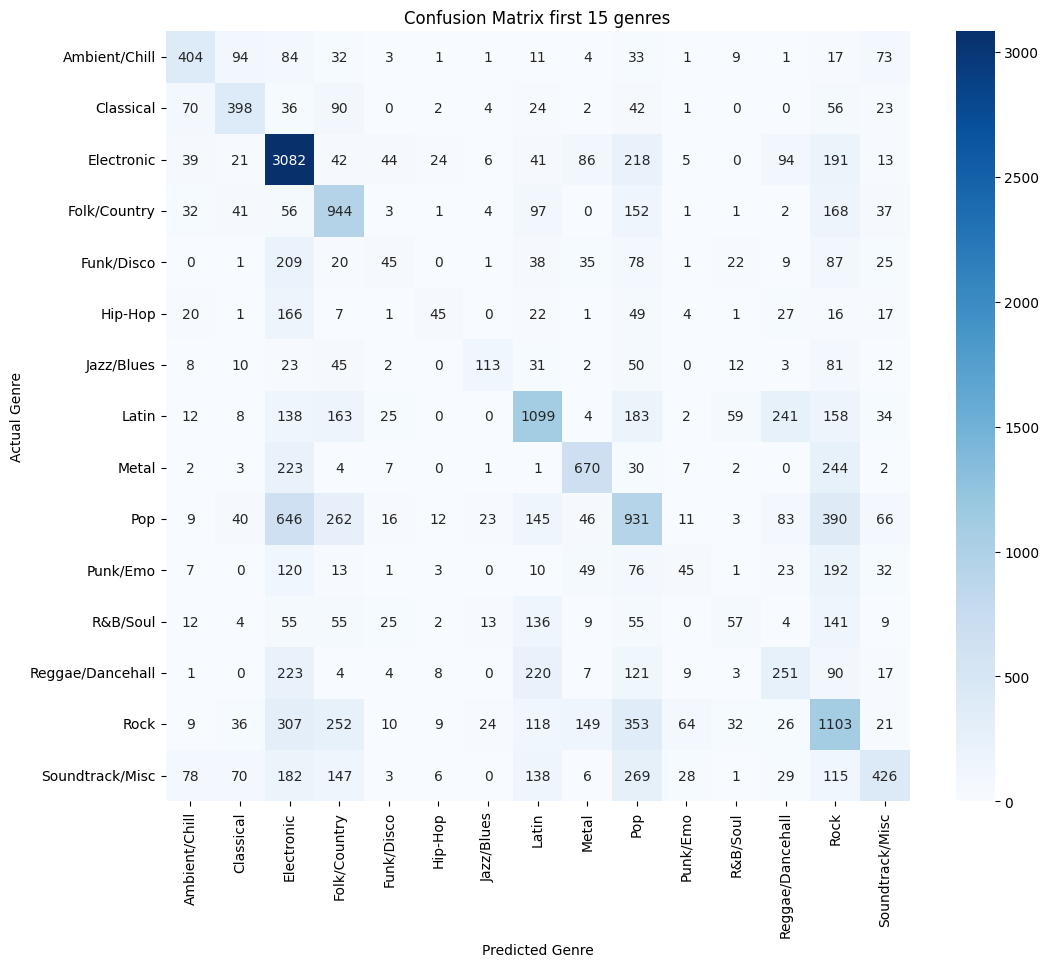

In [6]:
# generating a confusion matrix
cm=confusion_matrix(y_test,y_pred)
# only printing first 5 genres for easy readability
plt.figure(figsize=(12,10))
sns.heatmap(cm[:15,:15],annot=True,fmt='d',cmap='Blues',
            xticklabels=label_encoder.classes_[:15],
            yticklabels=label_encoder.classes_[:15])
plt.title('Confusion Matrix first 15 genres')
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.show()

### Saving the trained data

In [7]:
output_path='../data/trained_dataset.csv'
# index=False prevents pandas from writing dataframe index as coloumn
df_simplified.to_csv(output_path,index=False)
print('Successfully saved the training data to ',output_path)

Successfully saved the training data to  ../data/trained_dataset.csv


# Exploratory Data Analysis (EDA)